In [1]:
# import numpy as np
# import pandas as pd
# import os
# from matplotlib import pyplot as plt
# from tqdm import tqdm
# from PIL import Image as Img
# from keras.layers import Input, Dense, Reshape, LeakyReLU, Conv2D, Conv2DTranspose, Flatten, Dropout
# from keras.models import Model
# from keras.optimizers import RMSprop

# PIC_DIR = 'Downloads/Arab_dataset_cropped_224x224/GCC'
# IMAGES_COUNT = 5598
# WIDTH = 224
# HEIGHT = 224
# images = []

# # Function to load images from a directory
# def load_images_from_dir(directory):
#     image_files = os.listdir(directory)
#     loaded_images = []
#     for filename in tqdm(image_files):
#         # Load image
#         img = Img.open(os.path.join(directory, filename))
#         # Convert image to numpy array and normalize pixel values
#         img = np.array(img) / 255.0
#         loaded_images.append(img)
#     return loaded_images

# # Load images from directory
# images_directory = 'Downloads/Arab_dataset_cropped_224x224/GCC'
# images += load_images_from_dir(images_directory)
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
from tqdm import tqdm
from PIL import Image as Img
from keras.layers import Input, Dense, Reshape, LeakyReLU, Conv2D, Conv2DTranspose, Flatten, Dropout
from keras.models import Model
from keras.optimizers import RMSprop

PIC_DIR = 'GCC'
IMAGES_COUNT = 5598
WIDTH = 224
HEIGHT = 224
images = []


image_files = os.listdir(PIC_DIR)
loaded_images = []
for filename in tqdm(image_files):
            # Load image
            img = Img.open(os.path.join(PIC_DIR, filename))
            # Convert image to numpy array and normalize pixel values
            img = np.array(img) / 255.0
            loaded_images.append(img);
    





2024-02-25 23:07:08.633445: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
100%|██████████| 5598/5598 [00:08<00:00, 644.00it/s]


In [2]:
# Bringing in tensorflow
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

2024-02-25 23:07:32.394733: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-02-25 23:07:32.396031: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2024-02-25 23:07:33.601276: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:65:00.0 name: Quadro P5000 computeCapability: 6.1
coreClock: 1.7335GHz coreCount: 20 deviceMemorySize: 15.88GiB deviceMemoryBandwidth: 269.00GiB/s
2024-02-25 23:07:33.601318: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2024-02-25 23:07:33.603211: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2024-02-25 23:07:33.603280: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2024-02

In [49]:
images = [img for img in loaded_images if img.shape == (224, 224, 3)]
images = np.array(images)

# # Display the images
# plt.figure(figsize=(10, 10))
# for i in range(min(10, len(images_array))):
#     plt.subplot(2, 5, i+1)  # Adjust subplot layout as needed
#     plt.imshow(images_array[i])
#     plt.axis('off')
# plt.show()

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, Conv2DTranspose
from keras import Input
from keras.layers import Dense, Reshape, LeakyReLU, Conv2D, Conv2DTranspose, Flatten, Dropout
from keras.models import Model
from keras.optimizers import RMSprop

LATENT_DIM = 32
CHANNELS = 3



def create_generator():
    gen_input = Input(shape=(LATENT_DIM, ))

    x = Dense(128 * 14 * 14)(gen_input) 
    x = LeakyReLU()(x)
    x = Reshape((14, 14, 128))(x) #16*16*128
    
    x = Conv2D(256, 5, padding='same')(x)  #16*16*256
    x = LeakyReLU()(x)
   
    x = Conv2DTranspose(256, 4, strides=2, padding='same')(x)
    x = LeakyReLU()(x)
   
    x = Conv2DTranspose(256, 4, strides=2, padding='same')(x)
    x = LeakyReLU()(x)
   
    x = Conv2DTranspose(256, 4, strides=2, padding='same')(x)
    x = LeakyReLU()(x)
   
    x = Conv2DTranspose(256, 4, strides=2, padding='same')(x)
    x = LeakyReLU()(x)
 
    x = Conv2D(512, 5, padding='same')(x)
    x = LeakyReLU()(x)

    x = Conv2D(512, 5, padding='same')(x)
    x = LeakyReLU()(x)
    x = Conv2D(3, 5, padding='same')(x)
    x = LeakyReLU()(x)
    x = Conv2D(CHANNELS, 7, activation='tanh', padding='same')(x)

    generator = Model(gen_input, x)
    return generator


In [51]:
def create_discriminator():
    disc_input = Input(shape=(HEIGHT, WIDTH, CHANNELS))

    x = Conv2D(256, 3)(disc_input)
    x = LeakyReLU()(x)
    
    x = Conv2D(256, 4, strides=2)(x)
    x = LeakyReLU()(x)

    x = Conv2D(256, 4, strides=2)(x)
    x = LeakyReLU()(x)

    x = Conv2D(256, 4, strides=2)(x)
    x = LeakyReLU()(x)

    x = Conv2D(256, 4, strides=2)(x)
    x = LeakyReLU()(x)

    x = Flatten()(x)
    x = Dropout(0.4)(x)

    x = Dense(1, activation='sigmoid')(x)
    discriminator = Model(disc_input, x)

    optimizer = RMSprop(
        lr=.0001,
        clipvalue=1.0,
        decay=1e-8
    )

    discriminator.compile(
        optimizer=optimizer,
        loss='binary_crossentropy'
    )

    return discriminator






In [52]:
def build_discriminator():
    model=Sequential()
    
    model.add(Conv2D(32,5,input_shape=(224,224,3)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(64,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    model.add(Conv2D(128,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(256,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1,activation='sigmoid'))
    
    return model
    

In [53]:
generator = create_generator()
discriminator = create_discriminator()
discriminator.trainable = False



In [54]:
gan_input = Input(shape=(LATENT_DIM, ))
gan_output = discriminator(generator(gan_input))
gan = Model(gan_input, gan_output)

optimizer = RMSprop(lr=.0001, clipvalue=1.0, decay=1e-8)
gan.compile(optimizer=optimizer, loss='binary_crossentropy')


50/15000: d_loss: 0.6117,  a_loss: 0.6126.  (7.0 sec)
100/15000: d_loss: 0.3173,  a_loss: 1.7800.  (6.6 sec)
150/15000: d_loss: 0.4430,  a_loss: 1.4940.  (6.8 sec)
200/15000: d_loss: 0.6481,  a_loss: 3.0767.  (6.6 sec)
250/15000: d_loss: 0.5300,  a_loss: 1.5000.  (6.6 sec)
300/15000: d_loss: 0.4021,  a_loss: 1.8905.  (6.7 sec)
350/15000: d_loss: 0.5485,  a_loss: 1.2844.  (6.7 sec)
400/15000: d_loss: 0.5008,  a_loss: 1.2736.  (6.6 sec)
450/15000: d_loss: 0.6150,  a_loss: 1.4497.  (6.7 sec)
500/15000: d_loss: 0.5481,  a_loss: 1.0013.  (6.6 sec)
550/15000: d_loss: 0.6191,  a_loss: 1.1913.  (6.7 sec)
600/15000: d_loss: 0.6927,  a_loss: 0.8011.  (6.6 sec)
650/15000: d_loss: 0.5856,  a_loss: 1.0359.  (6.7 sec)
700/15000: d_loss: 0.7283,  a_loss: 1.0555.  (6.6 sec)
750/15000: d_loss: 0.6461,  a_loss: 1.0993.  (6.7 sec)
800/15000: d_loss: 0.6368,  a_loss: 0.8209.  (6.6 sec)
850/15000: d_loss: 0.6419,  a_loss: 1.5844.  (6.7 sec)
900/15000: d_loss: 0.5483,  a_loss: 1.3222.  (6.7 sec)
950/15000: 

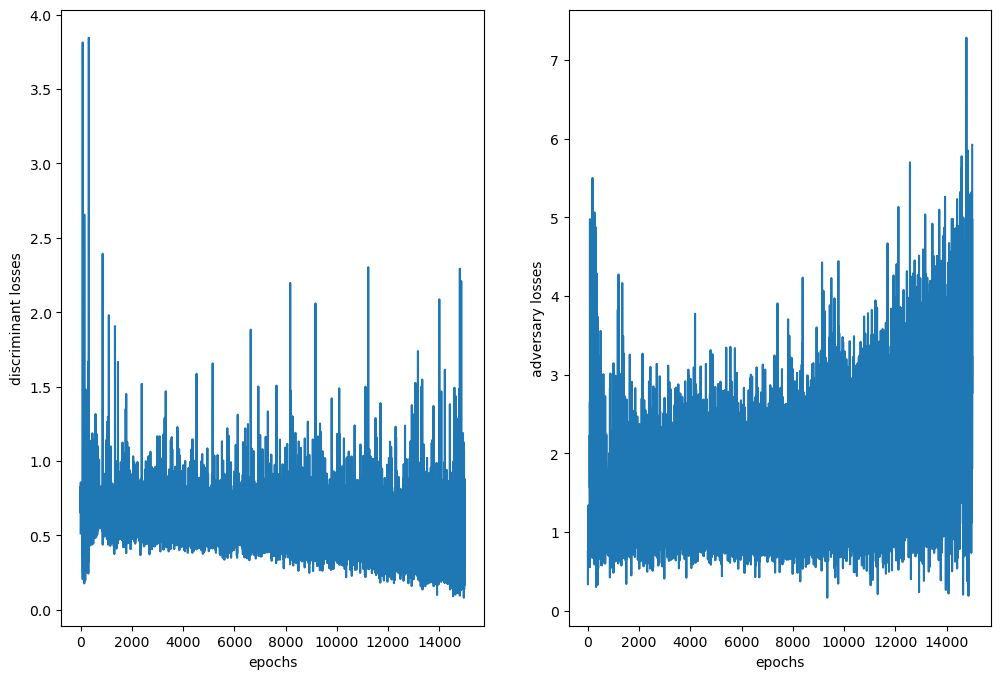

ModuleNotFoundError: No module named 'imageio'

In [56]:
import time
iters = 15000
batch_size = 16
from PIL import Image
RES_DIR = 'res2'
FILE_PATH = '%s/generated_%d.png'
if not os.path.isdir(RES_DIR):
    os.mkdir(RES_DIR)

CONTROL_SIZE_SQRT = 6
control_vectors = np.random.normal(size=(CONTROL_SIZE_SQRT**2, LATENT_DIM)) / 2

start = 0
d_losses = []
a_losses = []
images_saved = 0
for step in range(iters):
    start_time = time.time()
    latent_vectors = np.random.normal(size=(batch_size, LATENT_DIM))
    generated = generator.predict(latent_vectors)

    real = images[start:start + batch_size]
    combined_images = np.concatenate([generated, real])

    labels = np.concatenate([np.ones((batch_size, 1)), np.zeros((batch_size, 1))])
    labels += .05 * np.random.random(labels.shape)

    d_loss = discriminator.train_on_batch(combined_images, labels)
    d_losses.append(d_loss)

    latent_vectors = np.random.normal(size=(batch_size, LATENT_DIM))
    misleading_targets = np.zeros((batch_size, 1))

    a_loss = gan.train_on_batch(latent_vectors, misleading_targets)
    a_losses.append(a_loss)

    start += batch_size
    if start > len(images) - batch_size:
        start = 0

    if step % 50 == 49:
        gan.save_weights('gan.h5')

        print('%d/%d: d_loss: %.4f,  a_loss: %.4f.  (%.1f sec)' % (step + 1, iters, d_loss, a_loss, time.time() - start_time))

        control_image = np.zeros((WIDTH * CONTROL_SIZE_SQRT, HEIGHT * CONTROL_SIZE_SQRT, CHANNELS))
        control_generated = generator.predict(control_vectors)
        for i in range(CONTROL_SIZE_SQRT ** 2):
            x_off = i % CONTROL_SIZE_SQRT
            y_off = i // CONTROL_SIZE_SQRT
            control_image[x_off * WIDTH:(x_off + 1) * WIDTH, y_off * HEIGHT:(y_off + 1) * HEIGHT, :] = control_generated[i, :, :, :]
        im = Image.fromarray(np.uint8(control_image * 255))
        im.save(FILE_PATH % (RES_DIR, images_saved))
        images_saved += 1


plt.figure(1, figsize=(12, 8))
plt.subplot(121)
plt.plot(d_losses)
plt.xlabel('epochs')
plt.ylabel('discriminant losses')
plt.subplot(122)
plt.plot(a_losses)
plt.xlabel('epochs')
plt.ylabel('adversary losses')
plt.show()

import imageio
import shutil

images_to_gif = []
for filename in os.listdir(RES_DIR):
    images_to_gif.append(imageio.imread(RES_DIR + '/' + filename))
imageio.mimsave('visual.gif', images_to_gif)
shutil.rmtree(RES_DIR)

In [ ]:
import imageio
import shutil

images_to_gif = []
for filename in os.listdir(RES_DIR):
    images_to_gif.append(imageio.imread(RES_DIR + '/' + filename))
imageio.mimsave('visual.gif', images_to_gif)
shutil.rmtree(RES_DIR)

/tmp/ipykernel_2587284/2102990458.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images_to_gif.append(imageio.imread(RES_DIR + '/' + filename))
